## World Military Segmentation

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

### Import and Get Info()

In [2]:
data = pd.read_excel('./data/world_military_power.xlsx')
df = data.copy()
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/', '_').str.replace('-','_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength                        138 non-null    object 
 1   military_strength_power_index            138 non-null    float64
 2   aircraft_strength                        138 non-null    object 
 3   aircraft_strength_value                  138 non-null    int64  
 4   fighter_interceptor_strength             138 non-null    object 
 5   fighter_interceptor_strength_value       138 non-null    int64  
 6   attack_aircraft_strength                 138 non-null    object 
 7   attack_aircraft_strength_value           138 non-null    int64  
 8   transport_aircraft_fleet_strength        138 non-null    object 
 9   transport_aircraft_fleet_strength_value  138 non-null    int64  
 10  trainer_aircraft_fleet                   138 non-n

In [3]:
list(df.isnull().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 14,
 14,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 29,
 29,
 0,
 0,
 9,
 9]

In [4]:
df[df['military_strength'] == 'United States']

,military_strength,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter_interceptor_strength,fighter_interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet,trainer_aircraft_fleet_value,helicopter_fleet_strength,helicopter_fleet_strength_value,attack_helicopter_fleet_strength,attack_helicopter_fleet_strength_value,tank_strength,tank_strength_value,afv_apc_strength,afv_apc_strength_value,self_propelled_artillery_strength,self_propelled_artillery_strength_value,towed_artillery_strength,towed_artillery_strength_value,rocket_projector_strength,rocket_projector_strength_value,navy_fleet_strengths,navy_fleet_strengths_value,aircraft_carrier_fleet_strength,aircraft_carrier_fleet_strength_value,submarine_fleet_strength,submarine_fleet_strength_value,destroyer_fleet_strength,destroyer_fleet_strength_value,frigate_fleet_strength,frigate_fleet_strength_value,defense_spending_budget,defense_spending_budget_value,external_debt,external_debt_value,airport_totals,airport_totals_value,oil_production,oil_production_value,oil_consumption,oil_consumption_value,proven_oil_reserves,proven_oil_reserves_value,available_manpower,available_manpower_value,total_population,total_population_value,total_square_land_area,total_square_land_area_value,total_coastline_coverage,total_coastline_coverage_value,total_waterway_coverage,total_waterway_coverage_value,total_border_coverage,total_border_coverage_value
130,United States,0.0606,United States,13264,United States,2085,United States,715,United States,945,United States,2643,United States,5768,United States,967,United States,6289,United States,39253,United States,1465,United States,2740,United States,1366,United States,490.0,United States,20.0,United States,66.0,United States,91.0,United States,0.0,United States,"7,50,00,00,00,000",United States,"1,79,10,00,00,00,000",United States,13513,United States,"93,52,000",United States,"2,00,00,000",United States,"36,52,00,00,000",United States,"14,48,72,845",United States,"32,92,56,465",United States,"98,26,675",United States,19924,United States,41009,United States,12048.0


### Cleanup ...

In [5]:
# Remove commas from all columns in the DataFrame
df = df.replace(',', '', regex=True)

# Convert columns to appropriate numeric types
df = df.apply(pd.to_numeric, errors='ignore')

# Separate features into numeric and categorical
numeric_features = [col for col in df.columns if 'value' in col]
categorical_features = [col for col in df.columns if 'value' not in col and col != 'Military Strength']

# Exclude the United States if needed
exclude_us = False  # Set to True to exclude the United States
if exclude_us:
    df = df[df['Military Strength'] != 'United States']

# Define the preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the transformations
X = preprocessor.fit_transform(df)

In [6]:
numeric_features

['aircraft_strength_value',
 'fighter_interceptor_strength_value',
 'attack_aircraft_strength_value',
 'transport_aircraft_fleet_strength_value',
 'trainer_aircraft_fleet_value',
 'helicopter_fleet_strength_value',
 'attack_helicopter_fleet_strength_value',
 'tank_strength_value',
 'afv_apc_strength_value',
 'self_propelled_artillery_strength_value',
 'towed_artillery_strength_value',
 'rocket_projector_strength_value',
 'navy_fleet_strengths_value',
 'aircraft_carrier_fleet_strength_value',
 'submarine_fleet_strength_value',
 'destroyer_fleet_strength_value',
 'frigate_fleet_strength_value',
 'defense_spending_budget_value',
 'external_debt_value',
 'airport_totals_value',
 'oil_production_value',
 'oil_consumption_value',
 'proven_oil_reserves_value',
 'available_manpower_value',
 'total_population_value',
 'total_square_land_area_value',
 'total_coastline_coverage_value',
 'total_waterway_coverage_value',
 'total_border_coverage_value']

### K-Means Clustering with Elbow Method

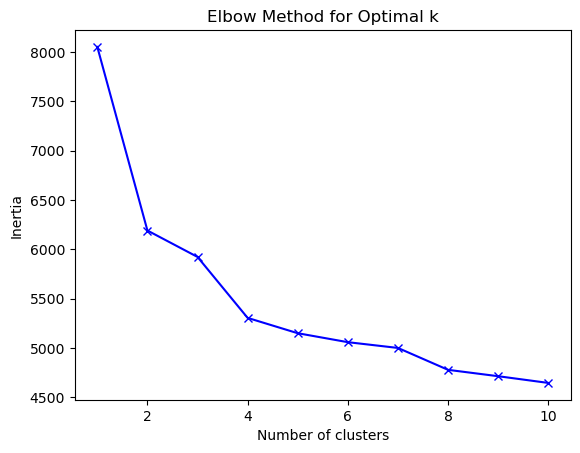

In [7]:
# Create an imputer to fill missing values (e.g., using the mean of each feature)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your data and transform the dataset
X_imputed = imputer.fit_transform(X)

# Now run KMeans on the imputed data
k_values = range(1, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_imputed)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### Hierarchical Clustering

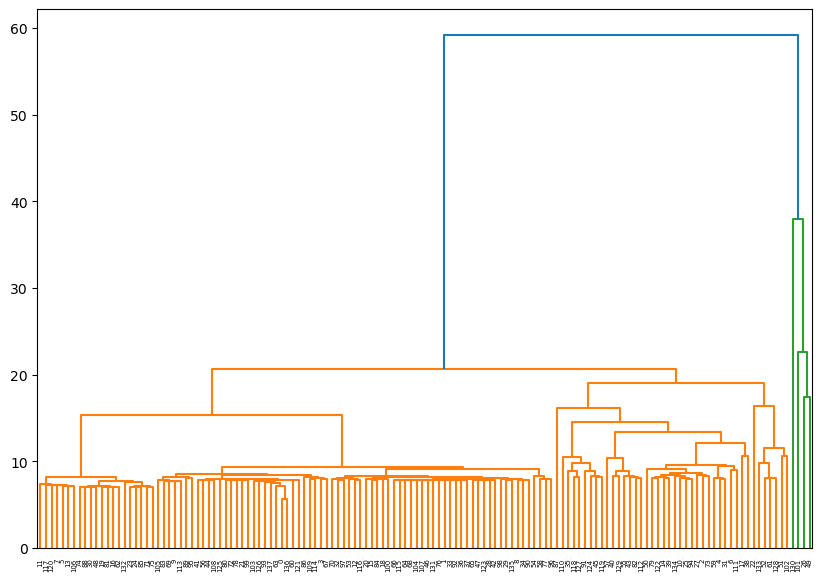

In [8]:
# Create an imputer to fill missing values (e.g., with the mean)
imputer = SimpleImputer(strategy='mean')

# Impute the missing values in the dataset
X_imputed = imputer.fit_transform(X)

# Perform hierarchical clustering with Ward's method
linked = linkage(X_imputed, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()



### Use Dendrogram with a Specified Cutoff (Color Threshold)

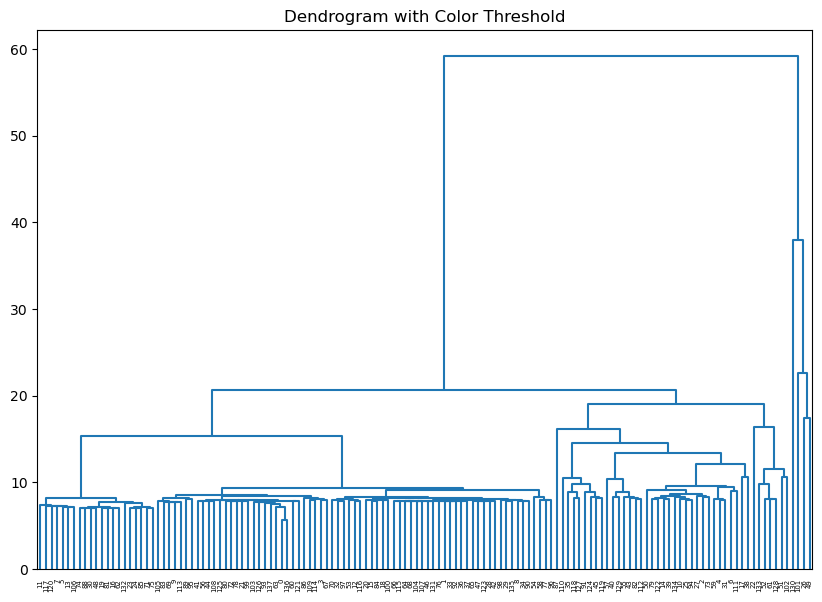

In [9]:
plt.figure(figsize=(10, 7))
dendrogram(linked, color_threshold=5)  # Adjust the threshold to highlight clusters
plt.title('Dendrogram with Color Threshold')
plt.show()


### Silhouette Analysis

In [10]:


# Try different numbers of clusters
for n_clusters in range(2, 11):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_imputed)
    silhouette_avg = silhouette_score(X_imputed, cluster_labels)
    print(f"For {n_clusters} clusters, the average silhouette score is {silhouette_avg}")


For 2 clusters, the average silhouette score is 0.6505704671689821
For 3 clusters, the average silhouette score is 0.5927717592564283
For 4 clusters, the average silhouette score is 0.5603037778882844
For 5 clusters, the average silhouette score is 0.07670680181791402
For 6 clusters, the average silhouette score is 0.06717214445313213
For 7 clusters, the average silhouette score is 0.06731853710596392
For 8 clusters, the average silhouette score is 0.0700254244599531
For 9 clusters, the average silhouette score is 0.06367726284362352
For 10 clusters, the average silhouette score is 0.005243331999702192


### Classify with K-Means

In [11]:
# Assuming you have performed K-Means with the optimal number of clusters (e.g., 2 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
df['stratification'] = kmeans.fit_predict(X_imputed)  # X_imputed is your preprocessed dataset

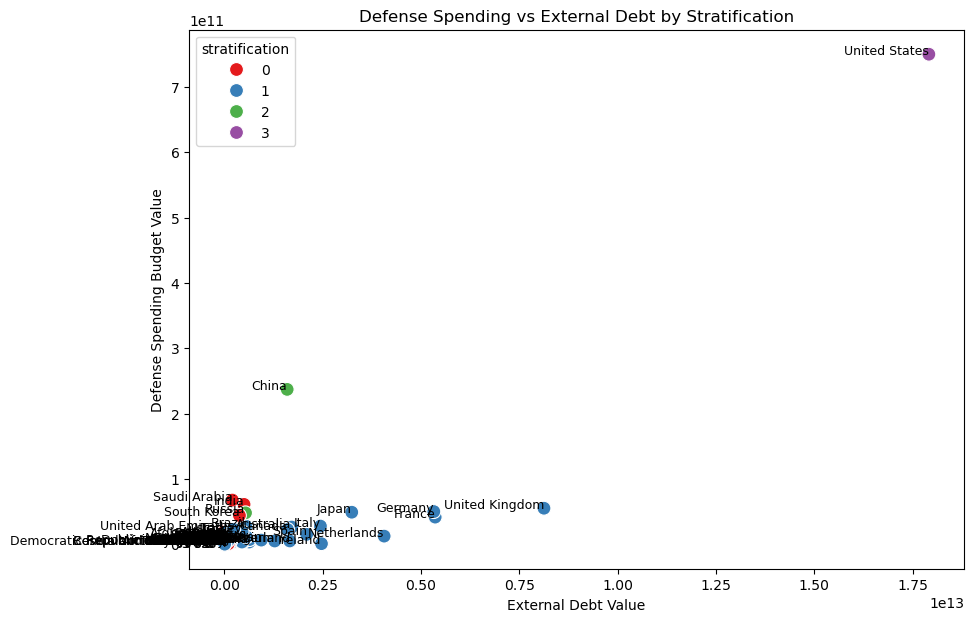

In [12]:


# Ensure the data types are correct (in case they are still strings)
df['defense_spending_budget_value'] = df['defense_spending_budget_value'].astype(float)
df['external_debt_value'] = df['external_debt_value'].astype(float)

# Set up the figure
plt.figure(figsize=(10, 7))

# Create the scatter plot using seaborn, with colors based on 'stratification'
sns.scatterplot(
    data=df,
    x='external_debt_value', 
    y='defense_spending_budget_value', 
    hue='stratification', 
    palette='Set1', 
    s=100  # Size of points
)

# Add text labels from the 'defense_spending_budget' column
for i in range(df.shape[0]):
    plt.text(
        df['external_debt_value'].iloc[i], 
        df['defense_spending_budget_value'].iloc[i], 
        df['defense_spending_budget'].iloc[i], 
        fontsize=9, 
        ha='right'  # Align text to the right
    )

# Customize the axes labels and title
plt.xlabel('External Debt Value')
plt.ylabel('Defense Spending Budget Value')
plt.title('Defense Spending vs External Debt by Stratification')

# Show the plot
plt.show()


In [14]:
df.columns

Index(['military_strength', 'military_strength_power_index',
       'aircraft_strength', 'aircraft_strength_value',
       'fighter_interceptor_strength', 'fighter_interceptor_strength_value',
       'attack_aircraft_strength', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv_apc_strength', 'afv_apc_strength_value',
       'self_propelled_artillery_strength',
       'self_propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',


In [17]:
# clus_pred = df.groupby(['stratification', 'military_strength_power_index']).mean().T
# clus_pred